In [2]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import accuracy_score 

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
X_test.shape 

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

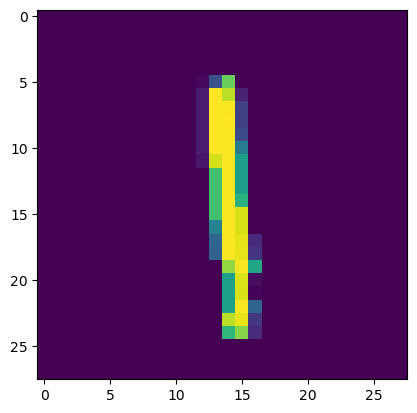

In [6]:
plt.imshow(X_train[8])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 18s 8ms/step - loss: 0.2763 - accuracy: 0.9197 - val_loss: 0.1559 - val_accuracy: 0.9551
Epoch 2/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1137 - accuracy: 0.9658 - val_loss: 0.1148 - val_accuracy: 0.9668
Epoch 3/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0795 - accuracy: 0.9755 - val_loss: 0.0989 - val_accuracy: 0.9710
Epoch 4/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0596 - accuracy: 0.9810 - val_loss: 0.0917 - val_accuracy: 0.9740
Epoch 5/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0456 - accuracy: 0.9851 - val_loss: 0.1016 - val_accuracy: 0.9723
Epoch 6/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0372 - accuracy: 0.9881 - val_loss: 0.1034 - val_accuracy: 0.9715
Epoch 7/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.1043 - val_accur

In [12]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [13]:
y_pred = y_prob.argmax(axis=1)

In [14]:
accuracy_score(y_test,y_pred)

0.9763

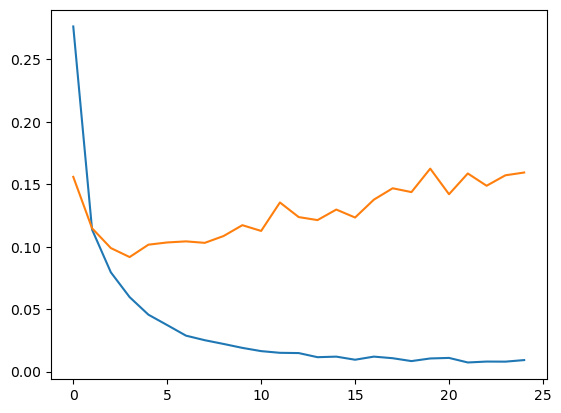

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

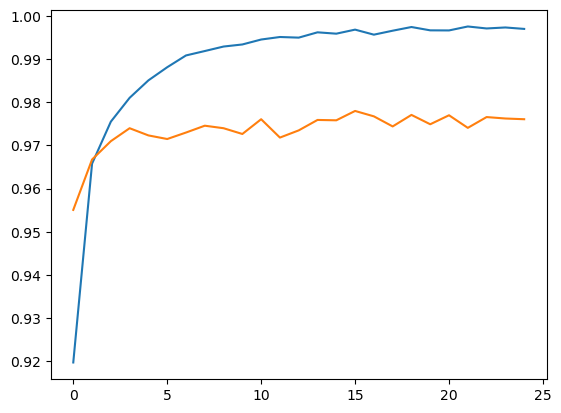

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

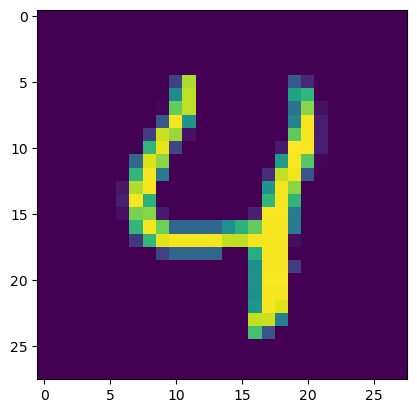

In [17]:
plt.imshow(X_test[4])

In [19]:
model.predict(X_test[4].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 32ms/step


array([4], dtype=int64)